# BIGMART SALES PREDICT

In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import scipy.stats as st

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

# Feature engineering
from sklearn.preprocessing import LabelEncoder

# Metrices
from sklearn.metrics import mean_squared_error,r2_score



# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

# Data Collection

In [2]:
# loading the dataset from csv file to a Pandas DataFrame
train_data = pd.read_csv("bigmart_Train.csv")
test_data = pd.read_csv("bigmart_Test.csv")

In [3]:
# Find out the shape of each train and test data
print("no. of rows and columns in train data", train_data.shape)
print("no. of rows and columns in test data", test_data.shape)

no. of rows and columns in train data (8523, 12)
no. of rows and columns in test data (5681, 11)


In [4]:
# Show all columns in dataframe
pd.set_option("display.max_columns",None)

# Details of train data
print("Details of Train data")
train_data.head()

Details of Train data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# Details of train data
print("Details of Test data")
test_data.head()

Details of Test data


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


# Data Analysis

In [6]:
# getting the information about the dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
# Checking the missing values
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train_data["source"] = "train"
test_data["source"]= "test"
df = pd.concat([train_data,test_data])

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [12]:
df.shape

(14204, 13)

In [13]:
# columns present in our dataset
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [14]:
# Information about datatypes and memory used by datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5

# Statistical Data Analysis

In [15]:
# For continuous variable
df.describe(include = ["int","float"])

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
# For categorical variables
df.describe(include = [object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,source
count,14204,14204,14204,14204,10188,14204,14204,14204
unique,1559,5,16,10,3,3,4,2
top,FDU15,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1,train
freq,10,8485,2013,1559,4655,5583,9294,8523


In [17]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [18]:
import seaborn as sns

<Axes: >

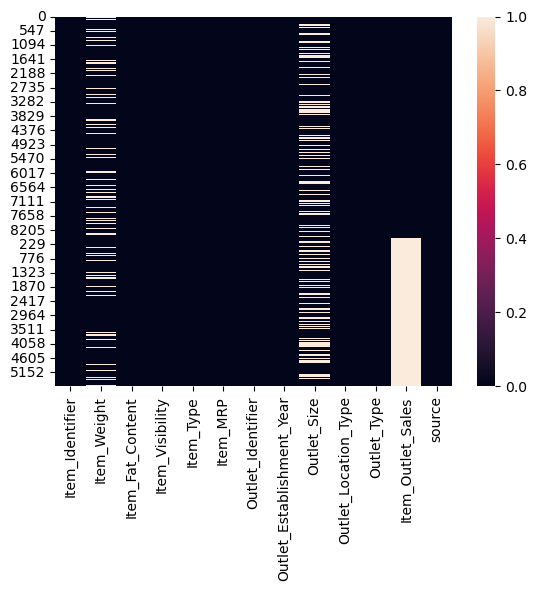

In [19]:
# Chech the missing value by visualization

sns.heatmap(df.isnull())

In [20]:
total_missing = df.isnull().sum().sum()
total_cell = df.shape[0]

# Percent of data that is missing

percent_missing = (total_missing/total_cell)*100
print("total {} % missing value is present".format(np.round(percent_missing)))

total 85.0 % missing value is present


In [21]:
# FInd out in which column missing value is present

missing_features = [features for features in df.columns if df[features].isnull().sum() >0]
missing_features

['Item_Weight', 'Outlet_Size', 'Item_Outlet_Sales']

In [22]:
# Segregate the numerical and categorical variables

categorical = [feature for feature in df.columns if df[feature].dtype == "object"]
print("number of categorical feature : {}".format(len(categorical)))
print("categorical feature :", categorical)
print("\n")


numerical = [feature for feature in df.columns if df[feature].dtype != "object"]
print("number of numerical feature : {}".format(len(numerical)))
print("numerical feature :", numerical)

number of categorical feature : 8
categorical feature : ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source']


number of numerical feature : 5
numerical feature : ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year', 'Item_Outlet_Sales']


# Unique value for categorical features

In [23]:
# Lets check the value count of each column to see if there are any unexpected value is present

for i in categorical:
    print(i)
    print(df[i].value_counts())
    print("*"*80)

Item_Identifier
Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64
********************************************************************************
Item_Fat_Content
Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64
********************************************************************************
Item_Type
Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                 

Observation:

- There are 16 categories in **Item_Type** but Basically there is 3 type of item either Food, Drinks and Non-consumables.
- Item_Identifier is a Id for Every Item_Type
- In Item_Fat_Content Low Fat is Written in three type and Regular fat is written in two type so we have to replace it by single value.

# Univariate Visualization

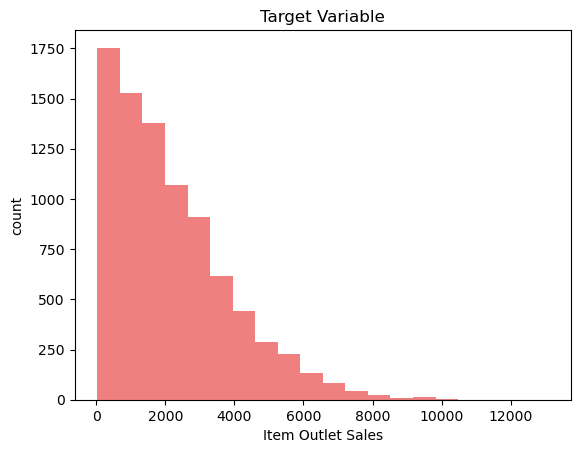

In [24]:
plt.hist(df['Item_Outlet_Sales'], bins = 20, color = 'lightcoral')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

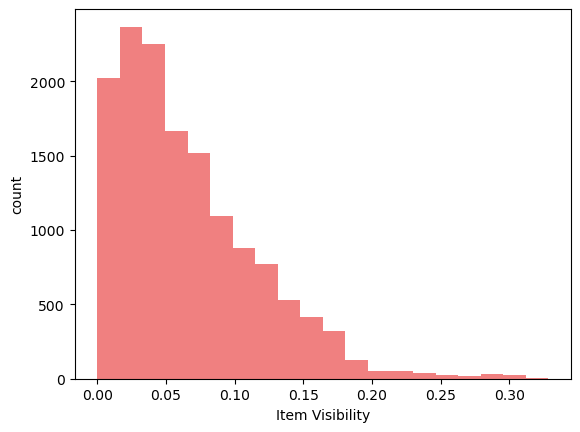

In [25]:
plt.hist(df['Item_Visibility'], bins = 20, color = 'lightcoral')
plt.xlabel('Item Visibility')
plt.ylabel('count')
plt.show()

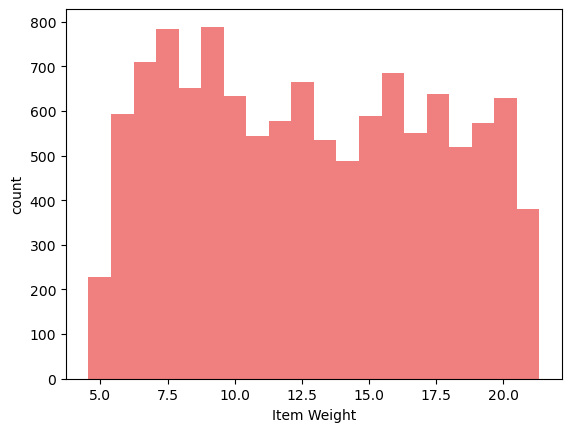

In [26]:
plt.hist(df['Item_Weight'], bins = 20, color = 'lightcoral')
plt.xlabel('Item Weight')
plt.ylabel('count')
plt.show()

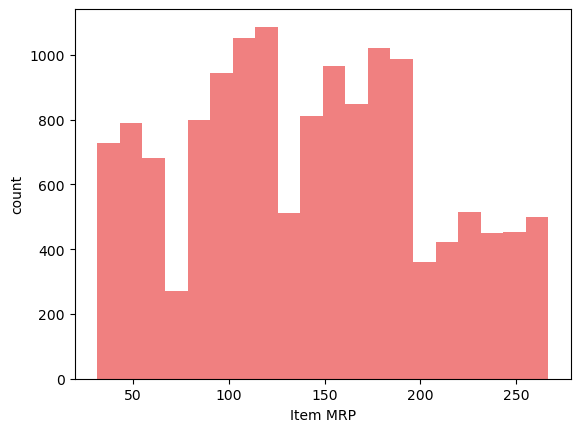

In [27]:
plt.hist(df['Item_MRP'], bins = 20, color = 'lightcoral')
plt.xlabel('Item MRP')
plt.ylabel('count')
plt.show()

### Box plot to detect Outliers

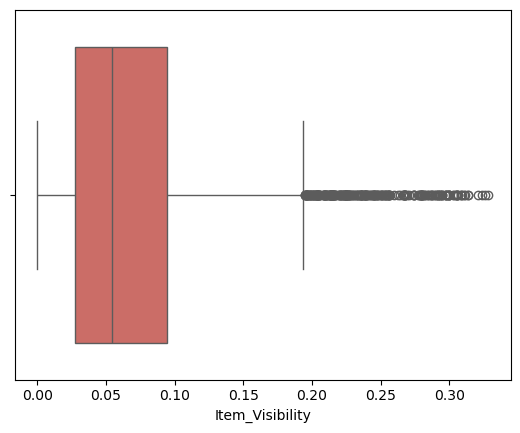

In [28]:
sns.boxplot(x =df["Item_Visibility"], data=df, palette= "hls" )
plt.show()

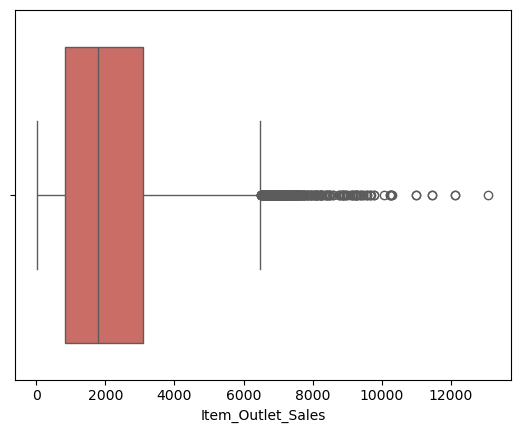

In [29]:
sns.boxplot(x =df["Item_Outlet_Sales"], data=df, palette= "hls")
plt.show()

### Count plot for categorical variable

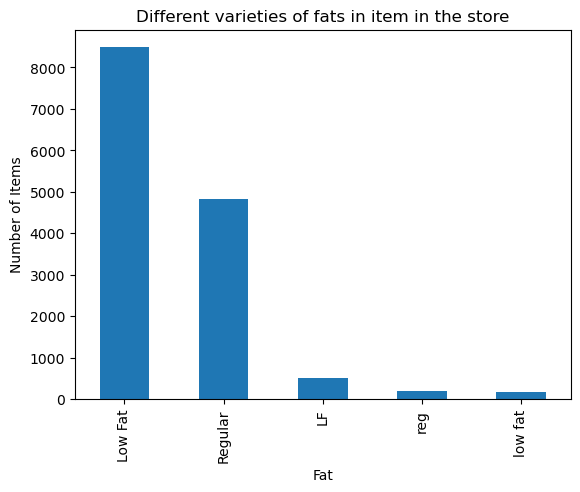

In [30]:
# checking different varieties of item fat content

df['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store')
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

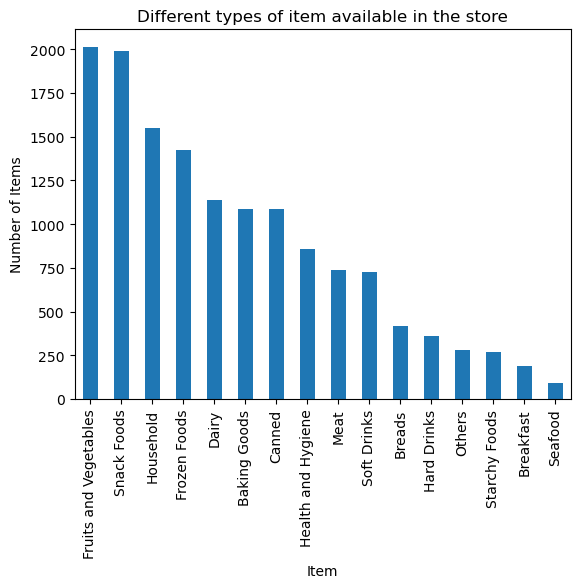

In [31]:
# we will analyze only the training set

df['Item_Type'].value_counts().plot.bar()
plt.title('Different types of item available in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

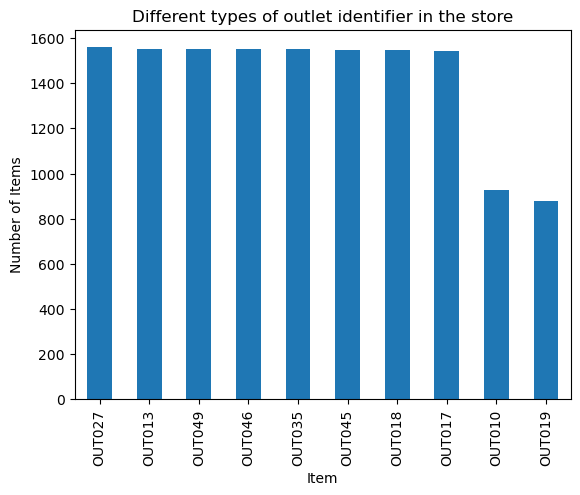

In [32]:
# we will analyze only the training set

df['Outlet_Identifier'].value_counts().plot.bar()
plt.title('Different types of outlet identifier in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

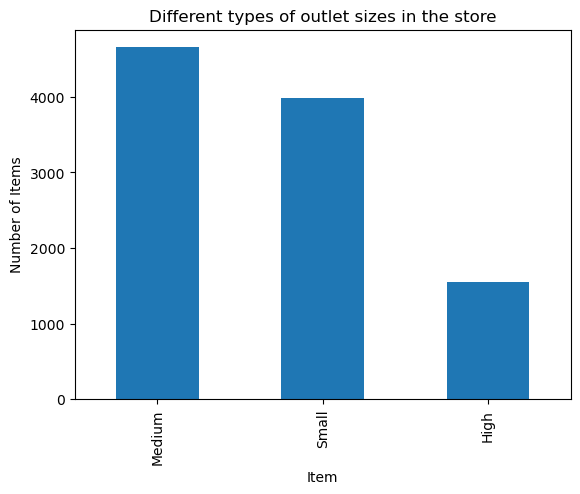

In [33]:
# we will analyze only the training set

df['Outlet_Size'].value_counts().plot.bar()
plt.title('Different types of outlet sizes in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

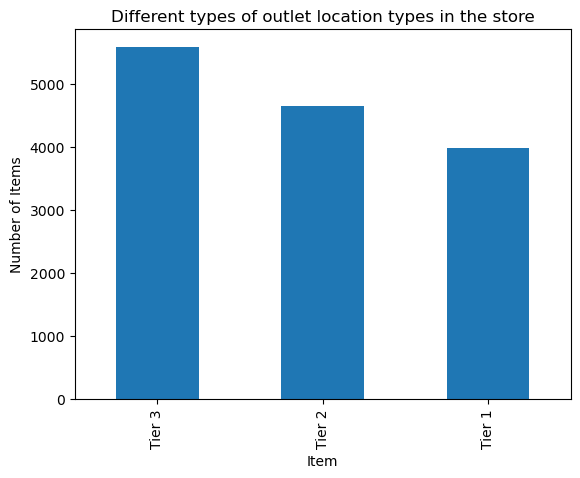

In [34]:
# we will analyze only the training set

df['Outlet_Location_Type'].value_counts().plot.bar()
plt.title('Different types of outlet location types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

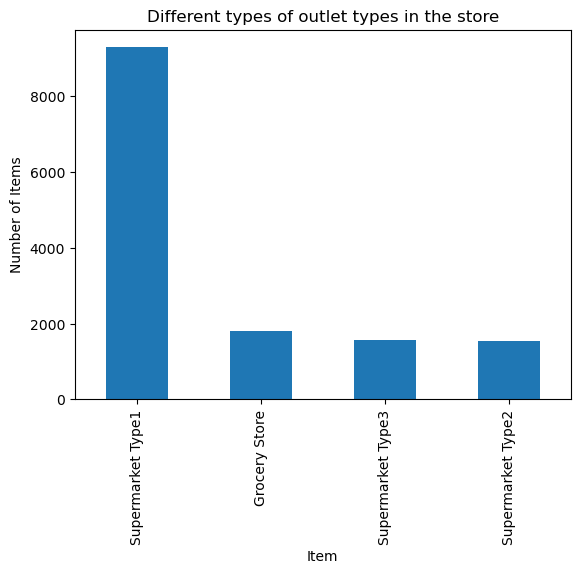

In [35]:
# we will analyze only the training set

df['Outlet_Type'].value_counts().plot.bar()
plt.title('Different types of outlet types in the store')
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

### Bivariate Visualization

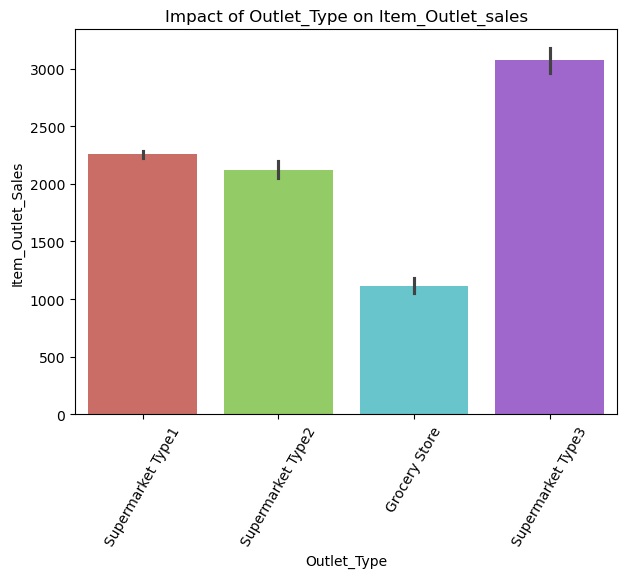

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(x = "Outlet_Type", y="Item_Outlet_Sales", data=df, palette= "hls")
plt.title("Impact of Outlet_Type on Item_Outlet_sales")
plt.xticks(rotation = 60)
plt.show()

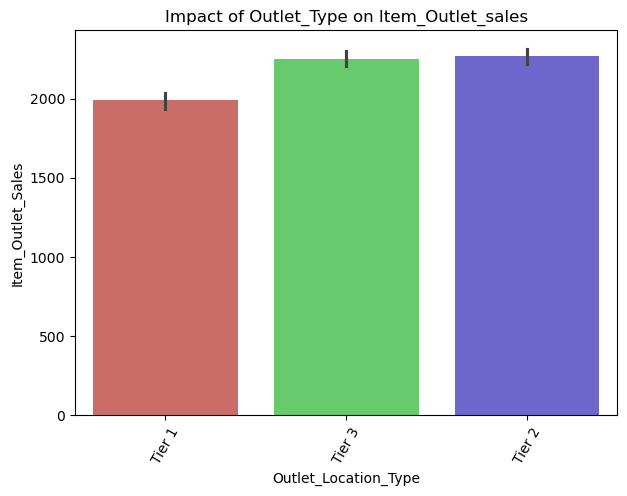

In [37]:
plt.figure(figsize=(7,5))
sns.barplot(x = "Outlet_Location_Type", y="Item_Outlet_Sales", data=df, palette= "hls")
plt.title("Impact of Outlet_Type on Item_Outlet_sales")
plt.xticks(rotation = 60)
plt.show()

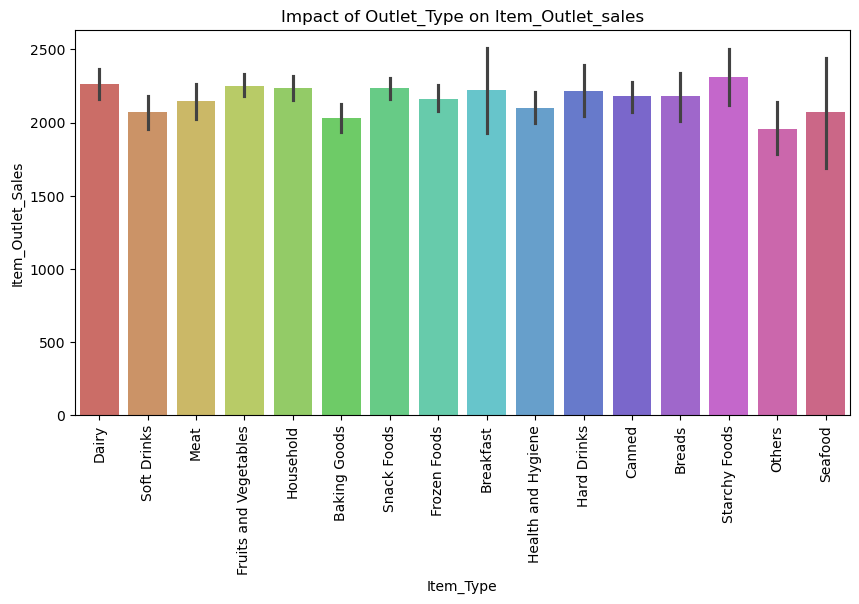

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x = "Item_Type", y="Item_Outlet_Sales", data=df, palette= "hls")
plt.title("Impact of Outlet_Type on Item_Outlet_sales")
plt.xticks(rotation = 90)
plt.show()

# Correlation

In [39]:
df.corr(numeric_only= True)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

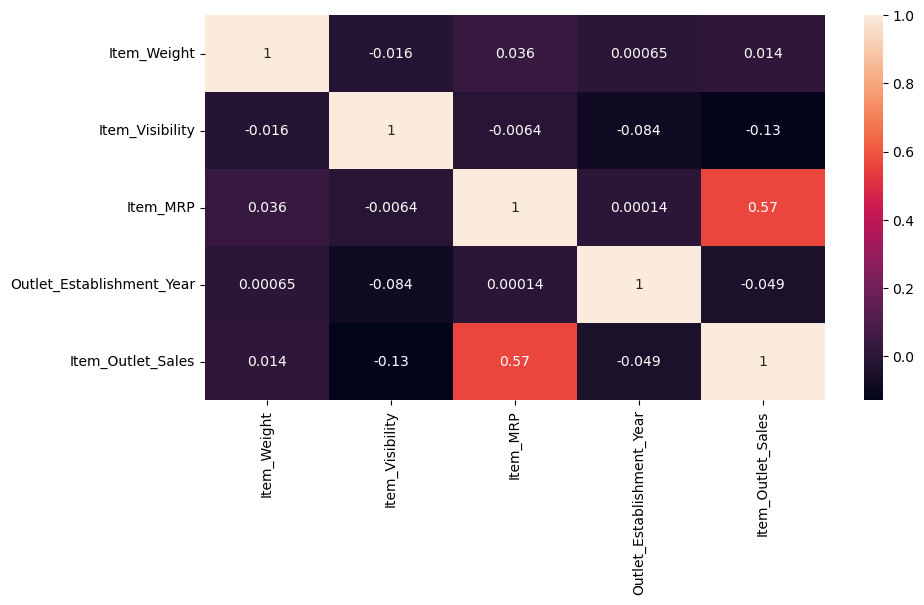

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only= True), annot= True)

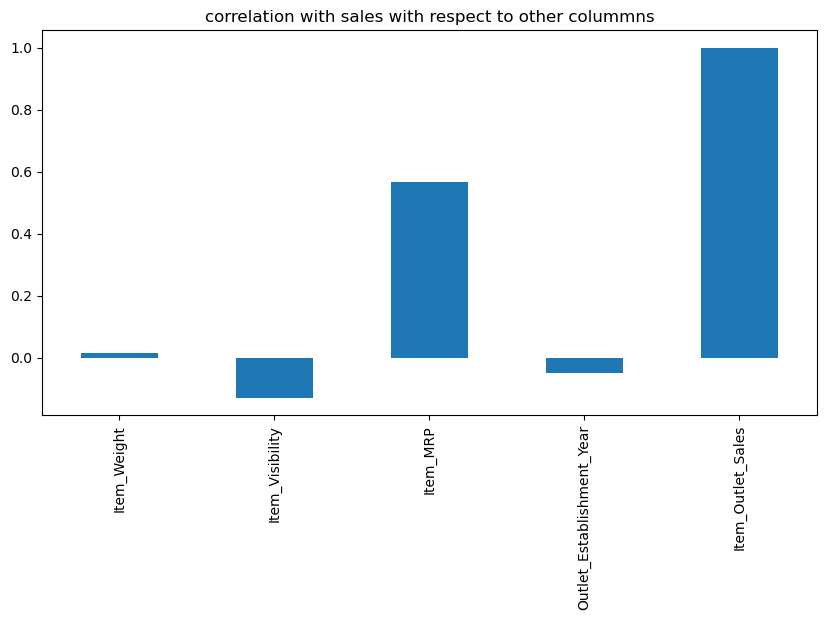

In [41]:
# correlation with respect to other columns
df.corrwith(df.Item_Outlet_Sales, numeric_only= True).plot.bar(figsize=(10,5), title= "correlation with sales with respect to other colummns")
plt.show()

# Data Cleaning

### Missing values

In [42]:
df["Item_Weight"].mean()

12.792854228644284

In [43]:
df["Item_Weight"].fillna(df["Item_Weight"].mean(), inplace = True)

In [44]:
df["Item_Weight"].isnull().sum()

0

In [45]:
df["Outlet_Size"].value_counts()

Outlet_Size
Medium    4655
Small     3980
High      1553
Name: count, dtype: int64

In [46]:
df["Outlet_Size"].fillna(df["Outlet_Size"].mode()[0], inplace = True)
# or df["Outlet_Size"].fillna("Medium", inplace = True)

#### check null value

In [47]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

### Remove Outliers 

In [48]:
outliers = ["Item_Visibility", "Item_Outlet_Sales"]
for i  in outliers:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    IQR = q3 - q1
    lower_limit = q1 - (IQR*1.5)
    upper_limit = q3 + (IQR*1.5)
    df.loc[df[i]<lower_limit,i] = lower_limit
    df.loc[df[i]>upper_limit,i] = upper_limit

In [49]:
# Check Outliers are removed or not

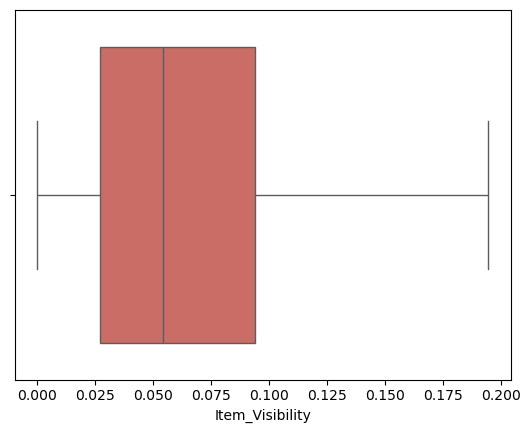

In [50]:
sns.boxplot(x =df["Item_Visibility"], data=df, palette= "hls")
plt.show()

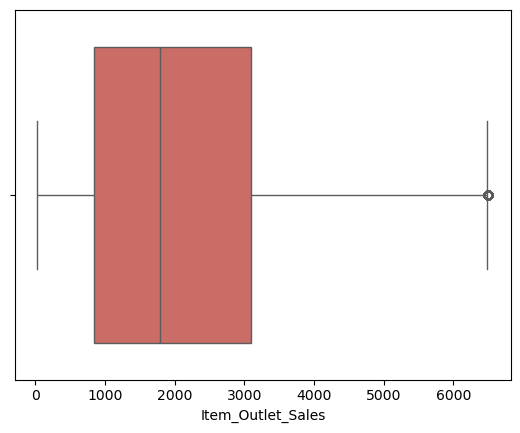

In [51]:
sns.boxplot(x =df["Item_Outlet_Sales"], data=df, palette= "hls")
plt.show()

In [52]:
df.shape

(14204, 13)

### Feature Engineering

In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [54]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [55]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace({"LF":"Low Fat", "low fat" : "Low Fat", "reg": "Regular"})

In [56]:
df["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [57]:
# Getting the first two characters of ID to separate them into different categories

df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x: x[0:2])

df['Item_Identifier'] = df['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

df['Item_Identifier'].value_counts()

Item_Identifier
Food              10201
Non_Consumable     2686
Drinks             1317
Name: count, dtype: int64

Text(0.5, 1.0, 'Impact of Item_fat_content on item_outlet_sales')

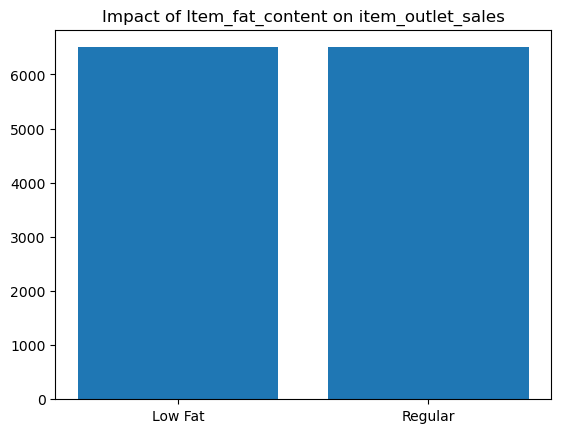

In [58]:
plt.bar(df["Item_Fat_Content"],df["Item_Outlet_Sales"])
plt.title("Impact of Item_fat_content on item_outlet_sales")

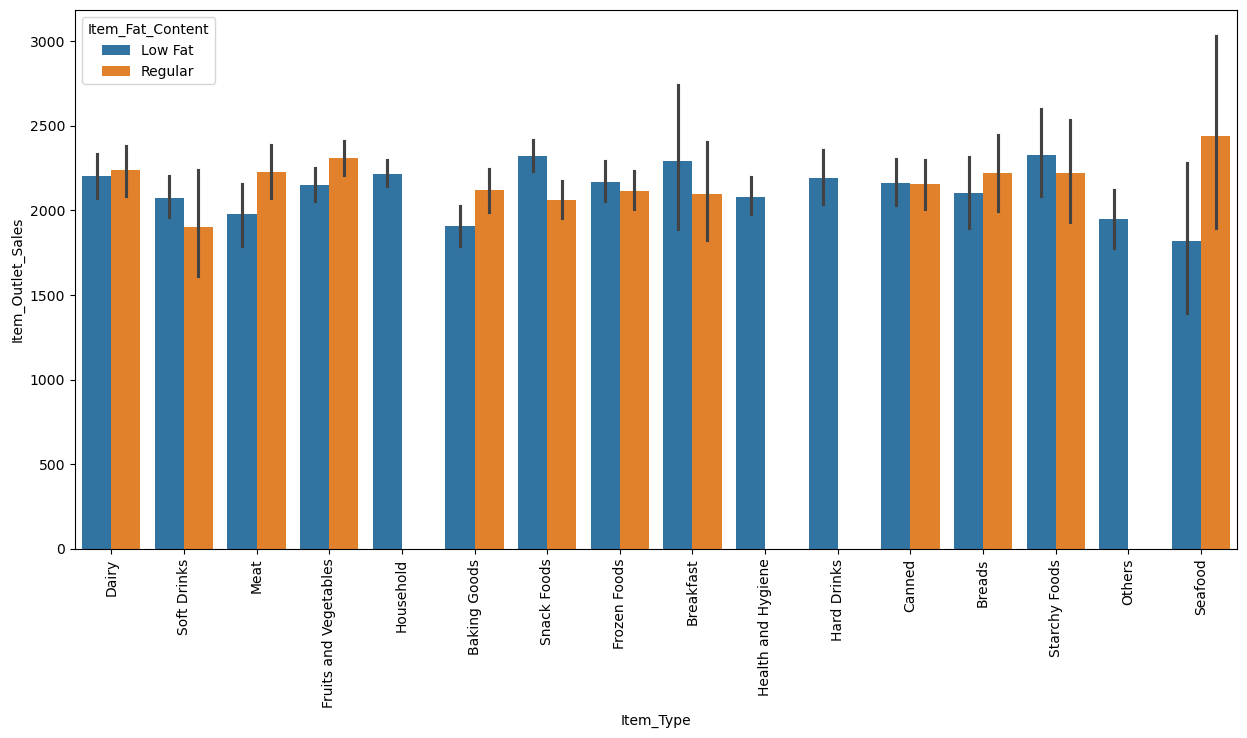

In [59]:
plt.figure(figsize=(15,7))
sns.barplot(x = "Item_Type", y = "Item_Outlet_Sales", hue = "Item_Fat_Content",data = df)
plt.xticks(rotation = 90)
plt.show()

#### Outlet_Years

In [60]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'source'],
      dtype='object')

In [61]:
df["Outlet_Establishment_Year"].value_counts()

Outlet_Establishment_Year
1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: count, dtype: int64

In [62]:
df["Outlet_Years"] = 2009 - df["Outlet_Establishment_Year"]

In [63]:
df["Outlet_Years"].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [64]:
df["Outlet_Years"].max()

24

In [65]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22


In [66]:
le = LabelEncoder()

#New variable for outlet
df['Outlet_Identifier'] = le.fit_transform(df['Outlet_Identifier'])
var_mod = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Location_Type','Outlet_Size','Outlet_Type']

for i in var_mod:
    df[i] = le.fit_transform(df[i])

In [67]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years
0,1,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380,train,10
1,0,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228,train,0
2,1,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700,train,10
3,1,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800,train,11
4,2,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052,train,22


In [68]:
#Divide into test and train:
train = df.loc[df['source']=="train"]  # select data where source is equal to train (ie select all data in dataset 
                                           # where source feature is equal train
test = df.loc[df['source']=="test"]   # select data where source is equal to test (ie select all data in dataset 
                                           # where source feature is equal to test

In [69]:
#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

In [70]:
X = train.drop(['Item_Outlet_Sales'],axis=1) # predictor variables

y = train['Item_Outlet_Sales']  # target variable

# Training Regression Models

In [71]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [72]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6818, 12)
(1705, 12)
(6818,)
(1705,)


In [73]:
#Importing Machine Learning Model
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#statistical Tools
from sklearn import metrics
from sklearn.metrics import accuracy_score, r2_score

In [74]:
lr = LinearRegression()
rig = Ridge()
las = Lasso()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
et = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
xgb = XGBRegressor()
abr = AdaBoostRegressor()

In [75]:
accuracy = {}
rmse = {}
explained_variance = {}
max_error = {}
MAE = {}

def train_model(model, model_name):
    print(model_name)
    model.fit(x_train,y_train)
    pred = model.predict(x_test)

    acc = metrics.r2_score(y_test, pred)*100
    accuracy[model_name] = acc
    print('R2_Score',acc)    # R2_score is the same as the accuracy of the model

    met = np.sqrt(metrics.mean_squared_error(y_test, pred))
    print('RMSE : ', met)              # 
    rmse[model_name] = met

    var = (metrics.explained_variance_score(y_test, pred))
    print('Explained_Variance : ', var)
    explained_variance[model_name] = var

    error = (metrics.max_error(y_test, pred))
    print('Max_Error : ', error)
    max_error[model_name] = error
    
    err = metrics.mean_absolute_error(y_test, pred)
    print("Mean Absolute Error", err)
    MAE[model_name] = err


In [76]:
train_model(lr, 'Linear Regression')

Linear Regression
R2_Score 53.46305369082869
RMSE :  1079.4809501270076
Explained_Variance :  0.5348276221797745
Max_Error :  3817.693
Mean Absolute Error 832.8889152492668


In [77]:
train_model(rf, 'random forest')

random forest
R2_Score 58.000933671141574
RMSE :  1025.5004599720987
Explained_Variance :  0.5807164297413572
Max_Error :  4250.473858000001
Mean Absolute Error 733.7467624404692


In [78]:
train_model(las, 'Lasso Regression')

Lasso Regression
R2_Score 53.5484525535384
RMSE :  1078.4900301814632
Explained_Variance :  0.535629124354791
Max_Error :  3822.97898661208
Mean Absolute Error 831.6350519444715


In [79]:
train_model(rig, 'Ridge')

Ridge
R2_Score 53.500748968310184
RMSE :  1079.0436677031519
Explained_Variance :  0.5351511789553103
Max_Error :  3821.1298685643137
Mean Absolute Error 832.2302435728157


In [80]:
train_model(xgb, "XGBRFRegressor")

XGBRFRegressor
R2_Score 56.305108981183174
RMSE :  1045.9992468882824
Explained_Variance :  0.5637262301395364
Max_Error :  4357.0221015625
Mean Absolute Error 755.5308166870323


In [81]:
train_model(dt, 'Decision TreeRegressor')

Decision TreeRegressor
R2_Score 23.06395038252048
RMSE :  1387.9728888202517
Explained_Variance :  0.23131055196271755
Max_Error :  6042.4679
Mean Absolute Error 977.7435056891496


In [82]:
train_model(et,"Extra TreesRegressor")

Extra TreesRegressor
R2_Score 55.934636609691466
RMSE :  1050.4242023094569
Explained_Variance :  0.5596667500147554
Max_Error :  4468.809652000002
Mean Absolute Error 755.5145037876832


# Compair All Model Performance

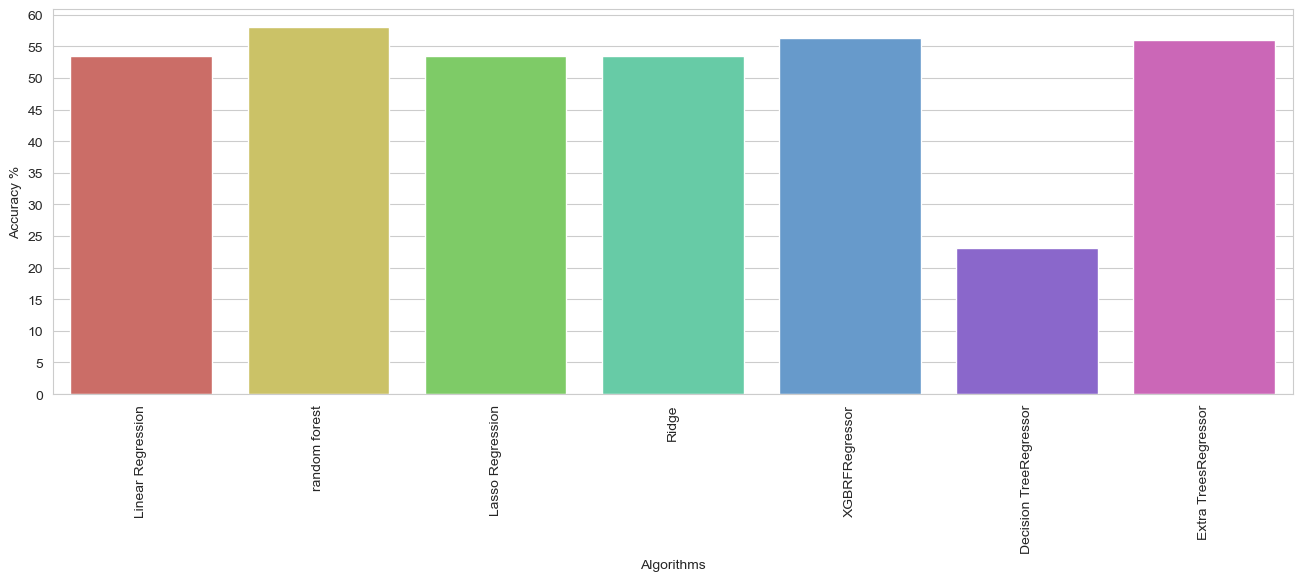

In [83]:
# visualizing the output

sns.set_style("whitegrid")
plt.figure(figsize=(16,5))
plt.yticks(np.arange(0,110,5))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
plt.xticks(rotation = 90)
sns.barplot(x=list(accuracy.keys()), y=list(accuracy.values()), palette= "hls")
plt.show()